<a href="https://colab.research.google.com/github/Soyeon-ErinLee/Machine_Learning/blob/master/0812%EC%B8%B5%EB%B3%84%EA%B5%AC%ED%98%84(2020616).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
pixel = pd.read_csv("/content/gdrive/Shared drives/2020 KU datathon/Visualization/roompixel.txt",sep="=",header=None,
                    names=['roomid','pixel'])

In [ ]:
extra=pixel[pixel.roomid.str.startswith("f")] # 기타학습공간

In [ ]:
room=pixel[pixel.roomid.str.startswith("r")] # 캐럴, 스룸 

In [ ]:
room["realroomid"]=room.roomid.str.split("r").str[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
roomB1 = room[room.realroomid.str.startswith("B")]
room2 = room[room.realroomid.str.startswith("2")]
room3 = room[room.realroomid.str.startswith("3")]
room4 = room[room.realroomid.str.startswith("4")]
room5 = room[room.realroomid.str.startswith("5")]

In [ ]:
extra["realroomid"]=extra.roomid.str.split("floor").str[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
extraB1 = extra[extra.realroomid.str.startswith("B")]
extra1 = extra[extra.realroomid.str.startswith("1")]
extra2 = extra[extra.realroomid.str.startswith("2")]
extra3 = extra[extra.realroomid.str.startswith("3")]
extra4 = extra[extra.realroomid.str.startswith("4")]
extra5 = extra[extra.realroomid.str.startswith("5")]

In [ ]:
# combined data for x,y location 

combinedB1 = pd.concat([roomB1,extraB1],axis=0)
combinedB1["x"]=combinedB1.pixel.str.strip("()").str.split(",").str[0].astype(float)
combinedB1["y"]=combinedB1.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined1 = extra1
combined1["x"]=combinedB1.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined1["y"]=combinedB1.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined2 = pd.concat([room2,extra2],axis=0)
combined2["x"]=combined2.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined2["y"]=combined2.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined3 = pd.concat([room3,extra3],axis=0)
combined3["x"]=combined3.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined3["y"]=combined3.pixel.str.strip("()").str.split(",").str[1].astype(float)

combined4 = pd.concat([room4,extra4],axis=0)
combined4["x"]=combined4.pixel.str.strip("( )").str.split(",").str[0].astype(float)
combined4["y"]=combined4.pixel.str.strip("( )").str.split(",").str[1].astype(float)

combined5 = pd.concat([room5,extra5],axis=0)
combined5["x"]=combined5.pixel.str.strip("()").str.split(",").str[0].astype(float)
combined5["y"]=combined5.pixel.str.strip("()").str.split(",").str[1].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
import pandas as pd
today=pd.read_csv("/content/gdrive/Shared drives/2020 KU datathon/data/0616SSSdata.csv")
today = today.drop("Unnamed: 0",axis=1)
today.head(6)
#데이터 파일 경로 오류로 인해 개인 드라이브로 수정. 이후에 작업할 경우 경로 수정바람.

,time_stamp_s,fire,dust,temperature,humidity,co2,moving,door,roomid,floor,co2score,dustscore,humidscore,temp1score,temp2score,totalscore,SSS
0,2020-06-16 05:02:27,0,29,22.834448,52.352936,751,0,0,202,floor2,40,80,100,50,75,67.5,4
1,2020-06-16 05:02:27,0,34,22.491245,52.299530,768,0,0,203,floor2,40,80,100,50,75,67.5,4
2,2020-06-16 05:02:27,0,34,21.965715,54.870636,742,0,0,204,floor2,60,80,100,50,75,72.5,4
3,2020-06-16 05:02:27,0,28,23.081125,49.728424,781,0,0,205,floor2,40,80,100,50,75,67.5,4
4,2020-06-16 05:02:27,0,29,23.134751,49.926788,783,0,0,208,floor2,40,80,100,50,75,67.5,4
5,2020-06-16 18:16:28,0,74,22.941699,48.263580,775,0,0,301,floor3,40,60,100,50,75,62.5,4


In [ ]:
import numpy as np

colorconditions = [
                 (today.SSS==1),
                 (today.SSS==2),
                 (today.SSS==3),
                 (today.SSS==4),
                 (today.SSS==5)
]
colorchoices= ['r','orange','y','g','b']
today["color"]= np.select(colorconditions, colorchoices)

In [ ]:
import numpy as np
today['time_stamp_s'] = pd.to_datetime(today['time_stamp_s'])
today0900 = today[today['time_stamp_s'].dt.time.astype(str)=='18:00:28']

In [ ]:
today0900[today0900["floor"]=="floorB"].shape

(25, 18)

In [ ]:
# 아래는 층별 구현한 것! 

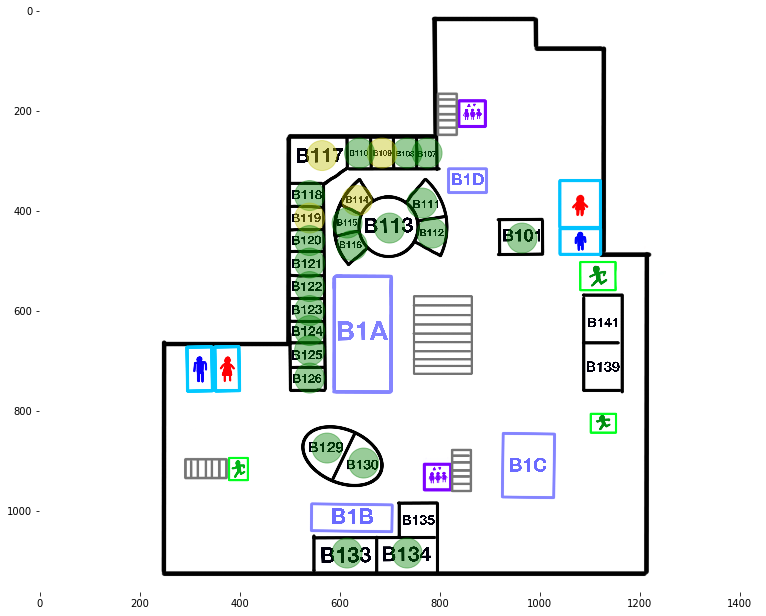

In [ ]:
# create circles with random locations: floor B1 -> B101 B111 B112 결측치 처리 필요

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


imB1 = np.array(Image.open('/content/gdrive/Shared drives/2020 KU datathon/Visualization/floorB1-final.png'), dtype=np.uint8) # ****

floorB1roomid = today0900[today0900['floor']=='floorB'].roomid
NB1 = floorB1roomid.shape[0] # ****
xB1 = np.array(combinedB1.x) # ****
yB1 = np.array(combinedB1.y) # ****
floorB1roomid = np.array(today0900[today0900['floor']=='floorB'].roomid)

# colors
cB1=[]
for i in range(NB1):
  cB1.append(tuple(today0900[today0900['roomid']==floorB1roomid[i]]['color'].values))
cB1 = list(sum(cB1,()))

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(xB1, yB1, cB1): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(imB1, interpolation = 'nearest')

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, cB1)
ax.add_collection(p)


plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


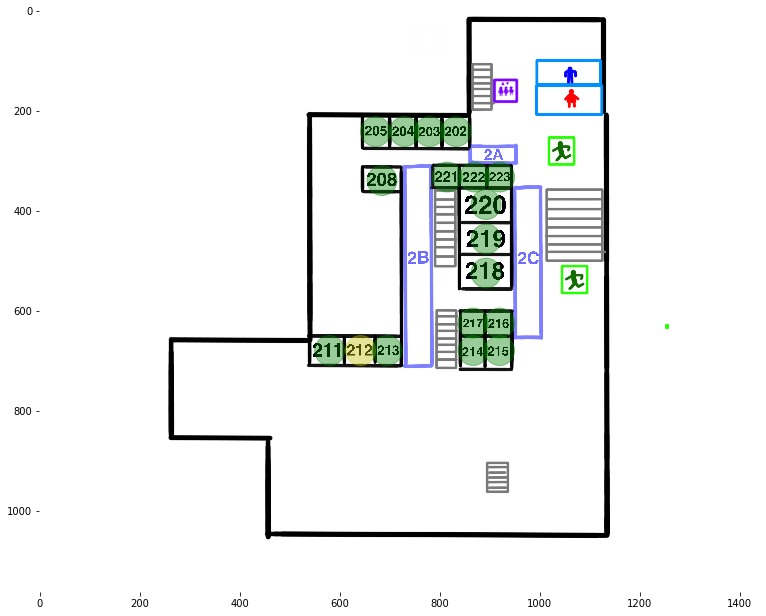

In [ ]:
# create circles with random locations: floor 2

im2 = np.array(Image.open('/content/gdrive/Shared drives/2020 KU datathon/Visualization/floor2-final.png'), dtype=np.uint8) # ****

floor2roomid = today0900[today0900['floor']=='floor2'].roomid
N2 = floor2roomid.shape[0] # ****
x2 = np.array(combined2.x) # ****
y2 = np.array(combined2.y) # ****
floor2roomid = np.array(today0900[today0900['floor']=='floor2'].roomid)

# colors
c2=[]
for i in range(N2):
  c2.append(tuple(today0900[today0900['roomid']==floor2roomid[i]]['color'].values))
c2 = list(sum(c2,()))

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x2, y2, c2): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im2, interpolation = 'nearest')

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c2)
ax.add_collection(p)


plt.show()

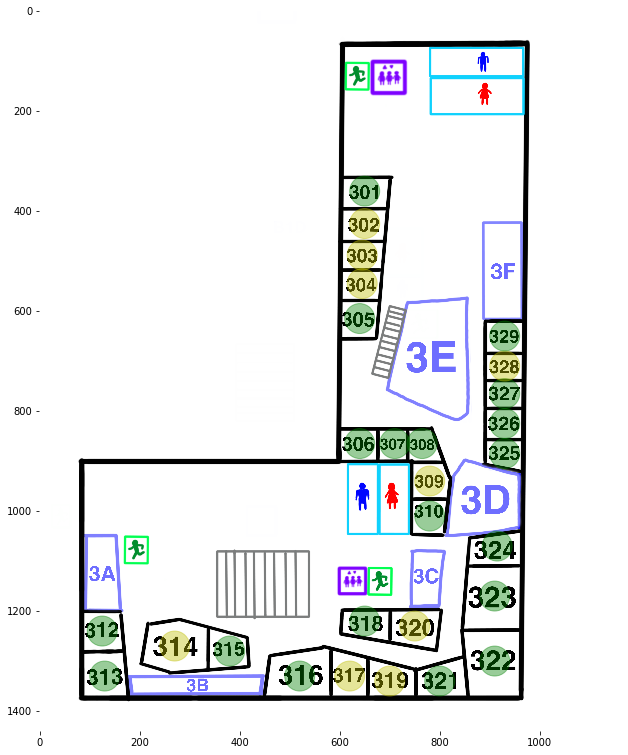

In [ ]:
# create circles with random locations: floor 3
# N3, x3, y3, c3

im3 = np.array(Image.open('/content/gdrive/Shared drives/2020 KU datathon/Visualization/floor3-final.png'), dtype=np.uint8) # ****

floor3roomid = today0900[today0900['floor']=='floor3'].roomid
N3 = floor3roomid.shape[0] # ****
x3 = np.array(combined3.x) # ****
y3 = np.array(combined3.y) # ****
floor3roomid = np.array(today0900[today0900['floor']=='floor3'].roomid)

# colors
c3=[]
for i in range(N3):
  c3.append(tuple(today0900[today0900['roomid']==floor3roomid[i]]['color'].values))
c3 = list(sum(c3,()))

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x3, y3, c3): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im3, interpolation = 'nearest')

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c3)
ax.add_collection(p)


plt.show()

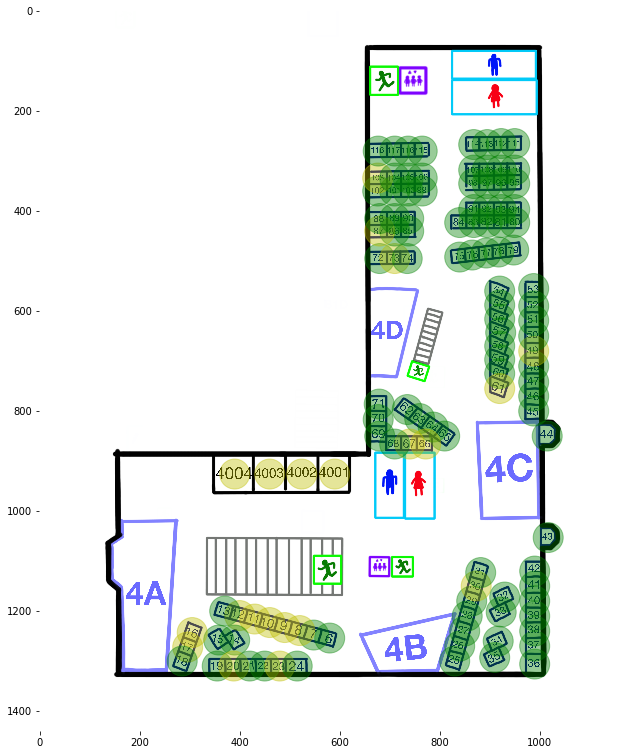

In [ ]:
# create circles with random locations: floor 4 -> 결측치 4096 4103 4105 4107 4108

im4 = np.array(Image.open('/content/gdrive/Shared drives/2020 KU datathon/Visualization/floor4-final.png'), dtype=np.uint8) # ****

floor4roomid = today0900[today0900['floor']=='floor4'].roomid
N4 = floor4roomid.shape[0] # ****
x4= np.array(combined4.x) # ****
y4 = np.array(combined4.y) # ****
floor4roomid = np.array(today0900[today0900['floor']=='floor4'].roomid)

# colors
c4=[]
for i in range(N4):
  c4.append(tuple(today0900[today0900['roomid']==floor4roomid[i]]['color'].values))
c4 = list(sum(c4,()))

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x4, y4, c4): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im4, interpolation = 'nearest')

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c4)
ax.add_collection(p)


plt.show()

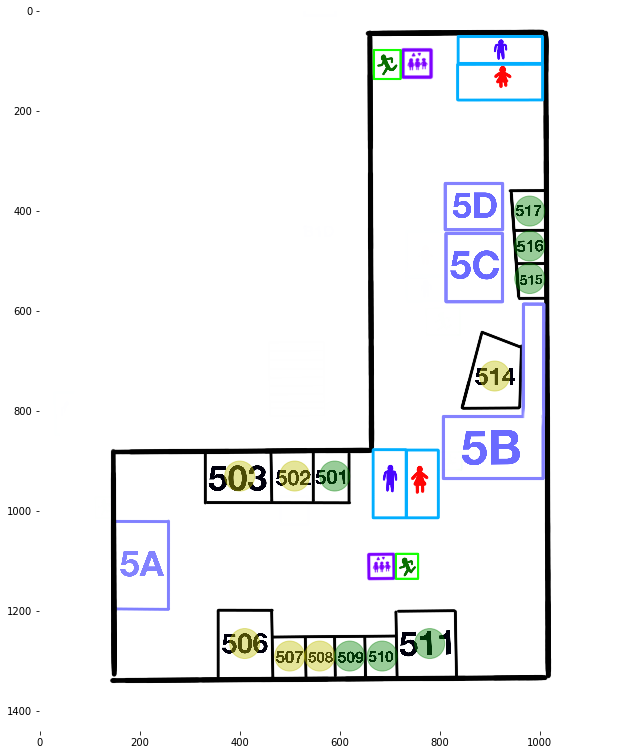

In [ ]:
# create circles with random locations: floor 5

im5 = np.array(Image.open('/content/gdrive/Shared drives/2020 KU datathon/Visualization/floor5-final.png'), dtype=np.uint8) # ****

floor5roomid = today0900[today0900['floor']=='floor5'].roomid
N5 = floor5roomid.shape[0] # ****
x5 = np.array(combined5.x) # ****
y5 = np.array(combined5.y) # ****
floor5roomid = np.array(today0900[today0900['floor']=='floor5'].roomid)

# colors
c5=[]
for i in range(N5):
  c5.append(tuple(today0900[today0900['roomid']==floor5roomid[i]]['color'].values))
c5 = list(sum(c5,()))

from matplotlib.patches import Circle 
patch = [] 
for x1, y1, c1 in zip(x5, y5, c5): 
    circle = Circle((x1, y1),30,linewidth=1, color=c1, fc = c1, ec = c1, alpha=0.4)
    patch.append(circle) 

# Create figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1],frameon=False)

# Display the image
ax.imshow(im5, interpolation = 'nearest')

from matplotlib.collections import PatchCollection 
p=PatchCollection(patch, c5)
ax.add_collection(p)


plt.show()